# Análisis de Datos de Vehículos y Modelado Predictivo

Este cuaderno contiene un análisis exploratorio de datos y un modelo predictivo para estimar el precio de venta de vehículos basado en las características proporcionadas.

## 1. Carga de Datos

Primero, cargamos el dataset y observamos sus primeras filas y su estructura.


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

import pandas as pd

# Cargar el dataset
data = pd.read_csv('nuevo_dataset_20000.csv')
data.head()

,year,make,model,trim,body,transmission,state,condition,odometer,mmr,sellingprice
0,2014,Chevrolet,Impala Limited,LT Fleet,Sedan,automatic,fl,4.0,21507.0,13450.0,13800.0
1,2003,Dodge,Ram Pickup 1500,SLT,Quad Cab,NaN,mo,31.0,79712.0,6025.0,6300.0
2,2007,Pontiac,G6,GT,Convertible,automatic,nj,34.0,65698.0,7375.0,8000.0
3,2011,Toyota,Corolla,LE,Sedan,automatic,fl,43.0,23634.0,10800.0,11400.0
4,2012,Lexus,ES 350,Base,Sedan,NaN,pa,35.0,26483.0,22500.0,23300.0


## 2. Limpieza de Datos
Se identifican y manejan los valores nulos, y se transforman algunas columnas para que puedan ser utilizadas en el modelo predictivo.

In [2]:
# Mostrar información del dataset
data.info()

# Eliminar las columnas directamente
data_clean = data.drop(['make', 'model', 'trim', 'body', 'transmission', 'state'], axis=1)

print(data_clean.isnull().sum())

data_clean = data_clean.dropna(subset=['condition', 'odometer', 'mmr'])

print(data_clean.isnull().sum())

# Mostrar el DataFrame resultante
print(data_clean.head())

num_filas = data_clean.shape[0]

print("Número total de filas:", num_filas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          20000 non-null  int64  
 1   make          19662 non-null  object 
 2   model         19659 non-null  object 
 3   trim          19647 non-null  object 
 4   body          19553 non-null  object 
 5   transmission  17635 non-null  object 
 6   state         20000 non-null  object 
 7   condition     19564 non-null  float64
 8   odometer      19997 non-null  float64
 9   mmr           19999 non-null  float64
 10  sellingprice  20000 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.7+ MB
year              0
condition       436
odometer          3
mmr               1
sellingprice      0
dtype: int64
year            0
condition       0
odometer        0
mmr             0
sellingprice    0
dtype: int64
   year  condition  odometer      mmr  sellingprice
0 

## 3. Análisis Exploratorio
Visualización y análisis de las principales características del dataset.

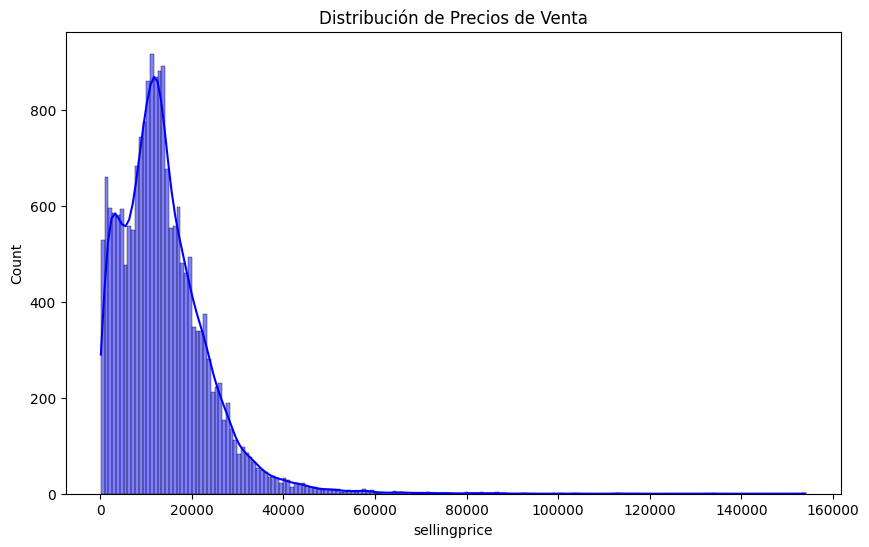

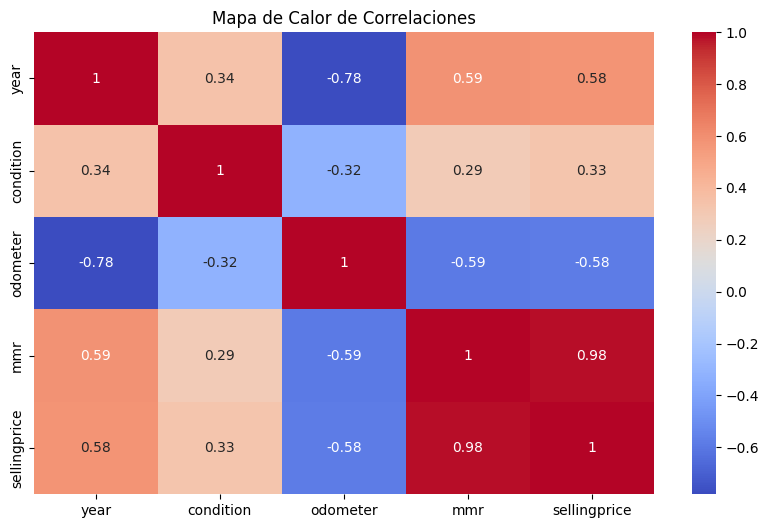

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de precios de venta
plt.figure(figsize=(10,6))
sns.histplot(data_clean['sellingprice'], kde=True, color='blue')
plt.title('Distribución de Precios de Venta')
plt.show()

# Correlaciones entre características numéricas
plt.figure(figsize=(10,6))
sns.heatmap(data_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

## 4. Preparación de Datos para el Modelo
Se preparan las características y la variable objetivo para entrenar el modelo de regresión lineal.

In [4]:
# Selección de características relevantes
features = ['year', 'odometer', 'mmr', 'condition']
X = data_clean[features]
y = data_clean['sellingprice']

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500/20000, random_state=42)

## 5. Modelo de Regresión Lineal multivariable
Entrenamiento del modelo y evaluación de su desempeño.

In [5]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [6]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [7]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Agregar una columna de unos para el término independiente
X_train_scaled = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
X_test_scaled = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))


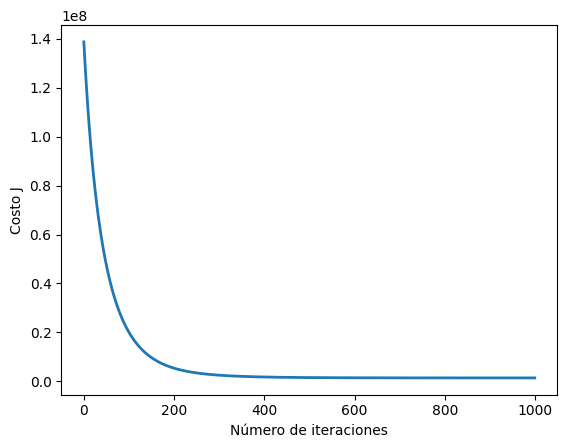

Error cuadrático medio (MSE): 2546269.9597874233
Coeficiente de determinación R²): 0.9755190124546591
Precio predicho para el nuevo auto: 67731.1932994558


e:\Inteligencia Artificial I\IA repositorio\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:
# Parámetros para el descenso de gradiente
alpha = 0.01  # Tasa de aprendizaje
num_iters = 1000  # Número de iteraciones

# Inicializar theta y ejecutar el descenso por gradiente

# Añadir una dimensión a theta
theta = np.zeros(X_train_scaled.shape[1])
theta, J_history = gradientDescentMulti(X_train_scaled, y_train, theta, alpha, num_iters)

# Graficar la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.show()

# Hacer predicciones en el conjunto de prueba
y_pred = np.dot(X_test_scaled, theta)

# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación R²):", r2)



# Predecir el precio para un nuevo auto
nuevo_auto = np.array([ 1, 10000, 2023, 4])

#print("Dimensiones de X_train:", X_train.shape)
#print("Dimensiones de nuevo_auto:", nuevo_auto.shape)
#print("Dimensiones de theta:", theta.shape)

# Ajusta los valores según tus características
nuevo_auto_scaled = scaler.transform(nuevo_auto.reshape(1, -1))
nuevo_auto_scaled = np.insert(nuevo_auto_scaled, 0, 1)
precio_predicho = np.dot(nuevo_auto_scaled, theta)
print("Precio predicho para el nuevo auto:", precio_predicho)